In [3]:
import os
import json
import pandas as pd

# JSON 파일이 저장된 폴더 경로
folder_path = '/Users/kimseohee/Desktop/Autonomous-Pedestrian-Prediction-with-Talchum-Motion-Data/Data/Data_TL'

# 결과를 저장할 리스트
data = []

# 폴더 내 모든 JSON 파일을 처리
for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            json_data = json.load(file)
            talchum_important = json_data.get('Talchum_info', {}).get('Talchum_important', '정보 없음')
            data.append({"File Name": file_name, "Talchum Important": talchum_important})

# DataFrame 생성
Talchum_important_df = pd.DataFrame(data)

# 결과 확인
display(Talchum_important_df)

,File Name,Talchum Important
0,MC01_A02_B031_CA1_M0005_2925.json,곰방대와 부채로 너울질 하는 춤
1,MC01_A09_B099_CA1_M0007_3870.json,"돌림사위, 울음태사위"
2,MC01_A06_B081_CA1_M0001_1845.json,북채를 떨어 뜨린다\n북을 잡으려다 놓치고 운다\n결국 북을 쥐고 신나게 춤을춘다
3,MC01_A04_B055_CA1_M0008_11100.json,"합장재배, 벽사진경의 의식무로서 연희초반 마당을 정화하는 대표적 동작"
4,MC01_A03_B049_CA1_M0014_25290.json,엎드려서 좌.우를 느리게 보는 동작
...,...,...
33200,MC01_A01_B004_CA1_M0004_5295.json,홍태기가 툭 덜어지는 맛으로 춤을 춘다
33201,MC01_A06_B082_CA1_M0009_4470.json,"첫 입장 배김새, 큰 배김새"
33202,MC01_A01_B014_CA1_M0004_1550.json,돌며 뿌리는 동작
33203,MC01_A03_B045_CA1_M0008_4170.json,왼쪽으로 높이 뛰어 2번 도는사위


In [4]:

Talchum_important_df.to_csv('extracted_talchum_important.csv', index=False, encoding='utf-8-sig')

In [9]:
print(Talchum_important_df.columns)

Index(['File Name', 'Talchum Important'], dtype='object')


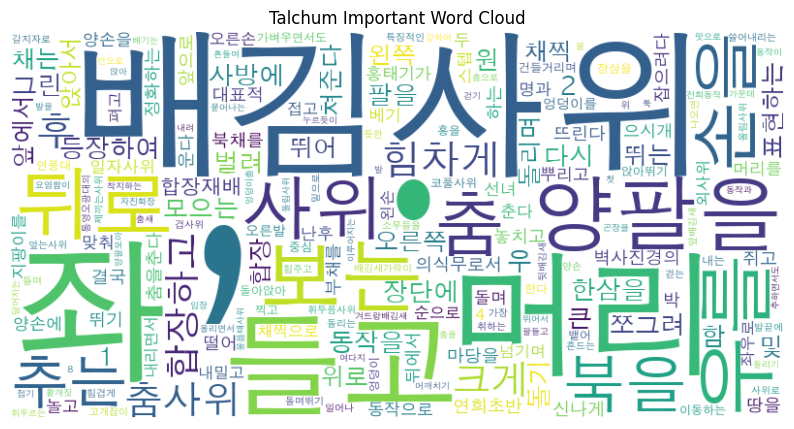

In [24]:
from soynlp.tokenizer import RegexTokenizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 데이터 준비
text_data = Talchum_important_df['Talchum Important'].dropna().tolist()
text = " ".join(text_data)

# 토큰화
tokenizer = RegexTokenizer()
tokens = tokenizer.tokenize(text)

# 불용어 제거
stopwords = ["는", "의", "를", "에", "로", "도", "다","동작", "배김새", "느리게", "엎드려서"]

tokens = [word for word in tokens if word not in stopwords]

# 단어 빈도 계산
word_freq = Counter(tokens)

# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path='/Library/Fonts/AppleGothic.ttf',  # MacOS 폰트 경로
    background_color='white',
    width=800,
    height=400,
    colormap='viridis'
).generate_from_frequencies(word_freq)

# 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Talchum Important Word Cloud")
plt.show()
